In [49]:
get_ipython().magic(u'run visualizations.ipynb')
import sys
from hits import CyDetHits, CTHHits, CDCHits

from memory_profiler import memory_usage
from collections import Counter
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


# Import Data

In [50]:
from root_numpy import root2array

data_file = "/vols/comet00/users/elg112/ICEDUST"\
            "/local_storage/SimDetectorResponse_tree"\
            "/new_sdetresp_analy/test_cth_signal_sample_analysis.root"
data_file =  "/vols/comet00/users/elg112/ICEDUST"\
            "/local_storage/MC3b_tree/sig_root/1000_cth_merged.root"
ice_sample = root2array(data_file, treename="COMETEventsSummary")

In [51]:
for name in ice_sample.dtype.names:
    print name

CTHHit.fModule
CTHHit.fCounter
CTHHit.fIsSc
CTHHit.fIsLG
CTHHit.fIsSig
CTHHit.fNContrib
CTHHit.fMCPos.fP.fX
CTHHit.fMCPos.fP.fY
CTHHit.fMCPos.fP.fZ
CTHHit.fMCPos.fE
CTHHit.fCharge
CTHHit.fChannel
CTHHit.fEventNumber
CTHHit.fHitNumber


CTHHit.fModule


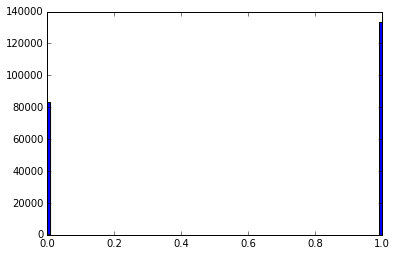

CTHHit.fCounter


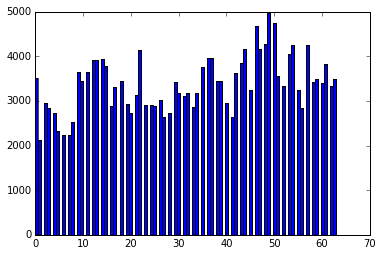

CTHHit.fIsSc


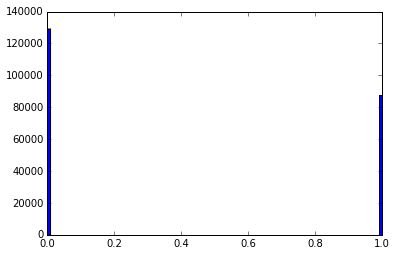

CTHHit.fIsLG


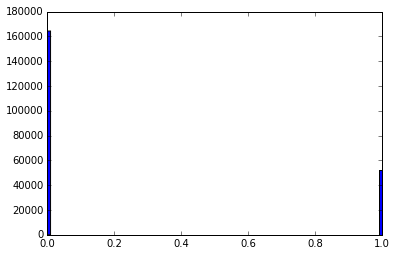

CTHHit.fIsSig


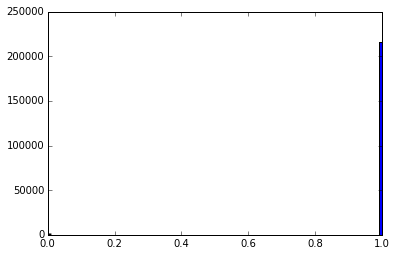

CTHHit.fNContrib


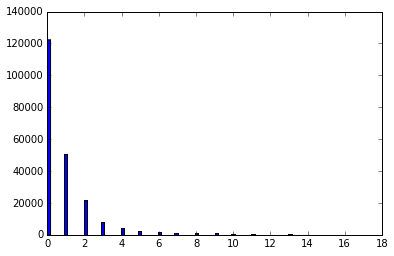

CTHHit.fMCPos.fP.fX


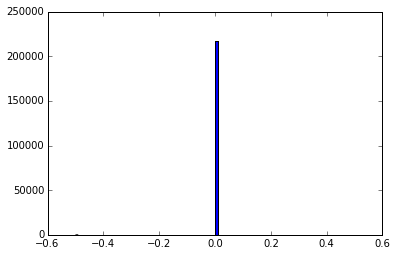

CTHHit.fMCPos.fP.fY


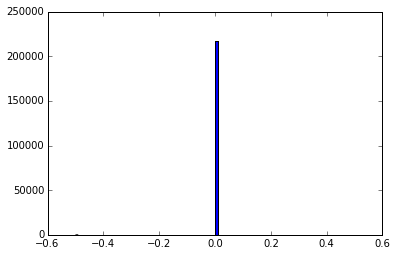

CTHHit.fMCPos.fP.fZ


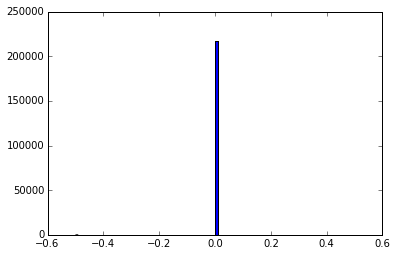

CTHHit.fMCPos.fE


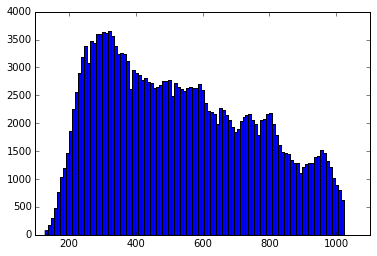

CTHHit.fCharge


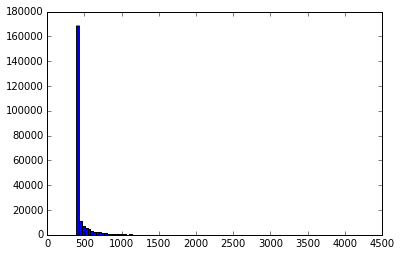

CTHHit.fChannel


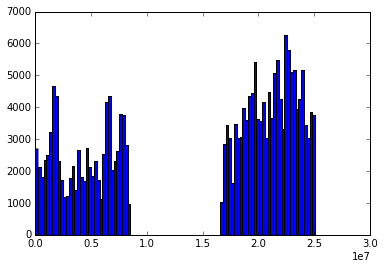

CTHHit.fEventNumber


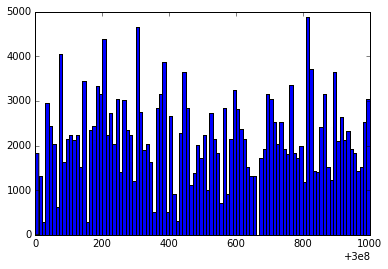

CTHHit.fHitNumber


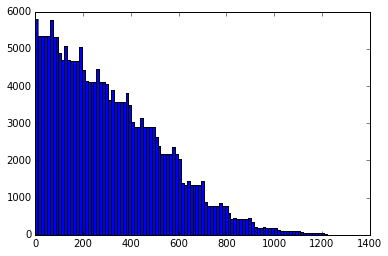

In [52]:
for name in ice_sample.dtype.names:
    print name
    plt.hist(ice_sample[name], bins=100)
    show()

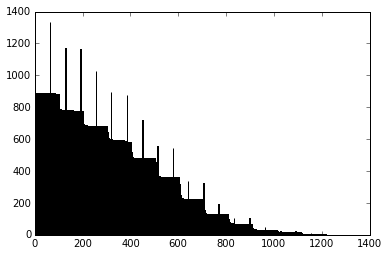

In [53]:
plt.hist(ice_sample["CTHHit.fHitNumber"], bins=600)
show()

In [54]:
print ice_sample["CTHHit.fEventNumber"]

[300000001 300000001 300000001 ..., 300000999 300000999 300000999]


In [55]:
print np.sort(np.array(Counter(ice_sample["CTHHit.fEventNumber"]).items())[:,1])

[  75   84   90  101  101  101  101  101  101  101  101  101  101  101  101
  101  101  101  101  101  101  101  101  101  101  101  101  101  101  101
  101  101  101  101  101  101  101  101  101  101  101  101  101  103  103
  103  103  103  103  103  104  107  112  117  149  161  184  199  202  202
  202  202  202  202  202  202  202  202  202  202  202  202  202  202  202
  202  202  202  202  202  202  204  204  204  204  204  204  204  204  204
  204  204  204  204  204  204  205  205  206  206  213  219  219  297  297
  303  303  303  303  303  303  303  303  303  303  303  303  303  303  303
  303  303  305  305  305  305  305  305  305  305  305  305  305  305  306
  306  306  307  307  308  308  308  309  310  312  313  325  371  373  375
  379  382  385  389  394  404  404  404  404  404  404  404  404  404  404
  404  404  404  404  404  404  404  404  404  404  404  404  404  404  406
  406  406  406  406  406  406  406  406  406  406  406  406  407  407  407
  408  408  

In [56]:
del ice_sample

In [57]:
import hits

In [58]:
reload(hits)

<module 'hits' from '../modules/hits.pyc'>

In [59]:
from hits import FlatHits

In [60]:
ice_flat = FlatHits(path=data_file, 
                    tree="COMETEventsSummary", 
                    prefix="CTHHit.f", 
                    key_name="EventNumber",
                    hit_type_name="MCPos.fP.fX",
                    signal_coding=[0],
                    branches=["Charge", 
                              "Channel", 
                              "HitNumber", 
                              "MCPos.fE",
                              "IsSc",
                              "IsLG",
                              "IsSig",
                              "Counter",
                              "Module"],
                    use_evt_idx=True)

In [61]:
print ice_flat.all_branches
print ice_flat.n_events
print ice_flat.n_hits
print ice_flat.event_to_n_hits
print ice_flat.hits_to_events
print ice_flat.event_to_hits

['CTHHit.fCharge', 'CTHHit.fChannel', 'CTHHit.fHitNumber', 'CTHHit.fMCPos.fE', 'CTHHit.fIsSc', 'CTHHit.fIsLG', 'CTHHit.fIsSig', 'CTHHit.fCounter', 'CTHHit.fModule', 'CTHHit.fMCPos.fP.fX', 'CTHHit.fEventNumber', 'CTHHit.fhits_index', 'CTHHit.fevent_index']
445
216646
[ 709  303  101  707  305  312  710  297  606  101  718  810  608  101  606
  101  404  406  303  611  305  707  406  507  101  614  404  505  610  202
  909  305  303  810  710  101  307  508  709  911  412  103  512  505  101
 1115  911  710  202  308  305  509  608  608  204  404  811  308  202  808
  608  511  899  409  101  101   75  514  707  199  415  505  508  406  610
  103  305  505  606  611  606  202 1014  303  612  608  202  916  810  810
  404  909  608  407  812  325  101  303  101  303  511  202  810  505  709
 1014  505  407  510  812  306  707  812  709  612  202  101  404  911  606
  505  606  404  606  303  406  103  619  713  510  608  610  509  509  808
  101  101  206  101  810  810  101  505  713 101

In [62]:
import pandas

In [43]:
iced_df = pandas.DataFrame(ice_flat.data)
iced_df

,CTHHit.fCharge,CTHHit.fChannel,CTHHit.fHitNumber,CTHHit.fMCPos.fE,CTHHit.fIsSc,CTHHit.fIsLG,CTHHit.fIsSig,CTHHit.fCounter,CTHHit.fModule,CTHHit.fMCPos.fP.fX,CTHHit.fEventNumber,CTHHit.fhits_index,CTHHit.fevent_index
0,401,688128,0,236,False,True,False,5,0,0,1000,0,0
1,400,688128,1,237,False,True,False,5,0,0,1000,1,0
2,400,688128,2,238,False,True,False,5,0,0,1000,2,0
3,400,688128,3,239,False,True,False,5,0,0,1000,3,0
4,400,688128,4,240,False,True,False,5,0,0,1000,4,0
5,400,688128,5,241,False,True,False,5,0,0,1000,5,0
6,399,688128,6,242,False,True,False,5,0,0,1000,6,0
7,400,688128,7,243,False,True,False,5,0,0,1000,7,0
8,399,688128,8,244,False,True,False,5,0,0,1000,8,0
9,401,688128,9,245,False,True,False,5,0,0,1000,9,0


In [44]:
del iced_df

0
IsSc [False]
IsLG [ True]
Counter [5]
Module [0]


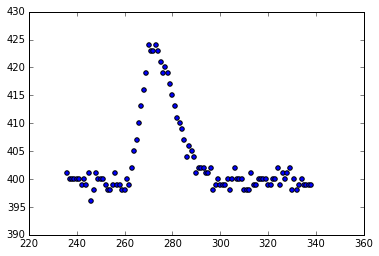

IsSc [ True]
IsLG [False]
Counter [49]
Module [0]


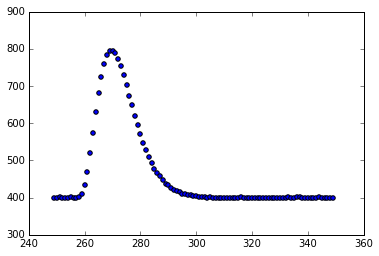

IsSc [ True]
IsLG [False]
Counter [50]
Module [0]


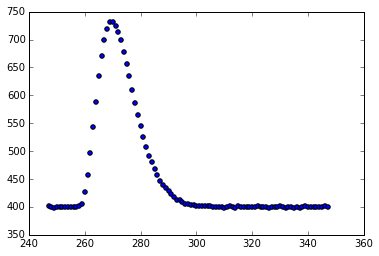

IsSc [False]
IsLG [False]
Counter [51]
Module [0]


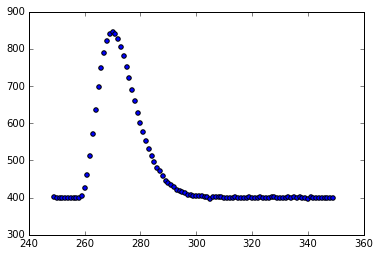

IsSc [ True]
IsLG [False]
Counter [51]
Module [0]


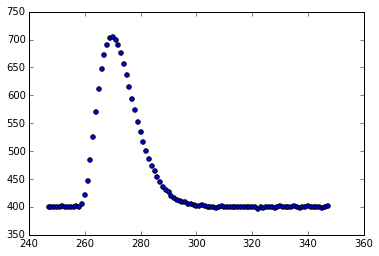

IsSc [False]
IsLG [ True]
Counter [52]
Module [0]


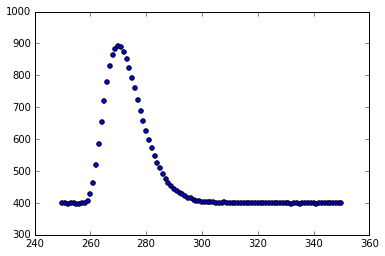

IsSc [False]
IsLG [ True]
Counter [53]
Module [0]


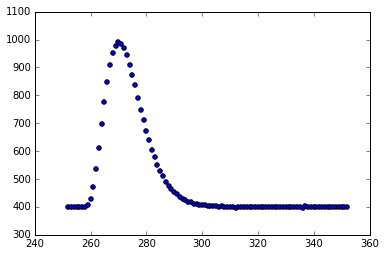

1
IsSc [False]
IsLG [False]
Counter [5]
Module [0]


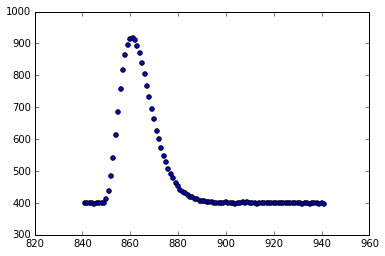

IsSc [False]
IsLG [False]
Counter [6]
Module [0]


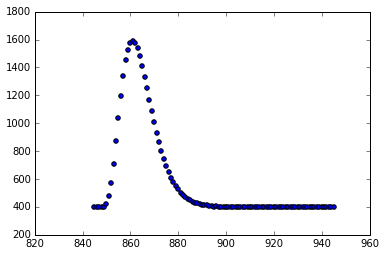

IsSc [ True]
IsLG [False]
Counter [8]
Module [0]


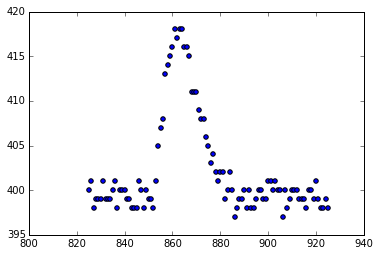

In [45]:
# Look at the digits
chan_name = "CTHHit.fChannel"
for event in np.unique(ice_flat.hits_to_events)[:2]:
    print event
    event_hits = ice_flat.get_events(events=event)
    channels = np.unique(event_hits[chan_name])
    for chan in channels:
        chan_hits = ice_flat.filter_hits(event_hits, chan_name, values=chan)
        plt.scatter(chan_hits["CTHHit.fMCPos.fE"],chan_hits["CTHHit.fCharge"])
        print "IsSc {}".format(np.unique(chan_hits["CTHHit.fIsSc"]))
        print "IsLG {}".format(np.unique(chan_hits["CTHHit.fIsLG"]))
        print "Counter {}".format(np.unique(chan_hits["CTHHit.fCounter"]))
        print "Module {}".format(np.unique(chan_hits["CTHHit.fModule"]))
        plt.show()

In [46]:
# Look at the digits
chan_name = "CTHHit.fChannel"
max_charge = []
min_time = []
for event in np.unique(ice_flat.hits_to_events)[:]:
    event_hits = ice_flat.get_events(events=event)
    event_hits = ice_flat.filter_hits(event_hits, "CTHHit.fIsSc", values=[True])
    event_hits = ice_flat.filter_hits(event_hits, "CTHHit.fIsSig", values=[True])
    if len(event_hits) != 0:
        max_charge.append(np.amax(event_hits["CTHHit.fCharge"]))
        min_time.append(np.amin(event_hits["CTHHit.fMCPos.fE"]))

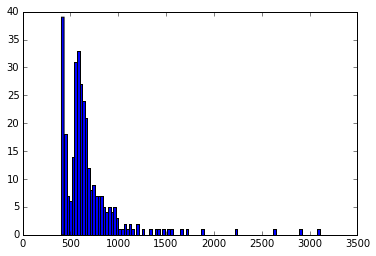

In [47]:
plt.hist(max_charge, bins=100)
plt.show()

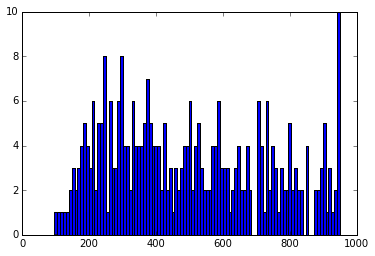

In [48]:
plt.hist(min_time, bins=100)
plt.show()